In [1]:
from sklearn import datasets, linear_model, tree, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression, make_hastie_10_2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
os.chdir(r"C:\Users\samir\Google Drive (samir.husain26@gmail.com)\Python\Project - NBA\Data files - all")

stats = pd.read_excel(r"nba-players-stats\Seasons_Stats.xlsx")
stats = stats[stats['Tm']!='TOT']
salary17 = pd.read_csv(r"salary\salary.csv")
aggr = {'Pos':'first','Tm':'last','G':'sum','GS':'sum','MP':'sum','PER':'mean','TS%':'mean','3PAr':'mean','FTr':'mean',
        'ORB%':'mean','DRB%':'mean','TRB%':'mean','AST%':'mean','STL%':'mean','BLK%':'mean','TOV%':'mean','USG%':'mean',
        'OWS':'mean','DWS':'mean','WS':'mean','OBPM':'mean','DBPM':'mean','BPM':'mean','VORP':'mean','FG':'sum','FGA':'sum',
        'FG%':'mean','3P':'sum','3P%':'mean','2P':'sum','2P%':'mean','eFG%':'mean','FT':'sum','FT%':'mean','ORB':'sum',
        'DRB':'sum','TRB':'sum','AST':'sum','STL':'sum','BLK':'sum','TOV':'sum','PF':'sum','PTS':'sum','Age':'mean'}
stats13 = stats[stats["Year"] == 2013.0]
stats13 = stats13.groupby(["Player"], as_index=False).agg(aggr)
stats14 = stats[stats["Year"] == 2014.0]
stats14 = stats14.groupby(["Player"], as_index=False).agg(aggr)
stats15 = stats[stats["Year"] == 2015.0]
stats15 = stats15.groupby(["Player"], as_index=False).agg(aggr)
stats16 = stats[stats["Year"] == 2016.0]
stats16 = stats16.groupby(["Player"], as_index=False).agg(aggr)
stats17 = stats[stats["Year"] == 2017.0]
stats17 = stats17.groupby(["Player"], as_index=False).agg(aggr)

stats1316 = pd.concat([stats13,stats14,stats15,stats16], ignore_index=True)
pacers_names = stats17[["Player","Tm"]]; pacers_names = pacers_names[pacers_names["Tm"] == "IND"]; pacers_names = pacers_names.drop(['Tm'], axis = 1)
salary17 = salary17.groupby(["Player"]).agg({'Tm':'last', 'season17_18':'last'})

stats17 = pd.merge(stats17, salary17, how='left', on='Player')
stats17 = stats17.drop(['Tm_y'], axis=1); stats17 = stats17.drop(['PER'], axis=1)
stats17 = stats17.rename(columns={'Tm_x':'Tm', 'season17_18':'SALARY'})

pacers = stats17[stats17.Tm == "IND"]
stats17 = stats17[stats17.Tm != "IND"]

In [2]:
print(stats17[['TS%','TRB%','AST%','STL%','TOV%','USG%','BPM']].describe())

              TS%        TRB%        AST%        STL%        TOV%        USG%  \
count  469.000000  470.000000  470.000000  470.000000  469.000000  470.000000   
mean     0.526143   10.152305   12.993050    1.552801   12.848863   18.577908   
std      0.092171    5.250688    9.198367    0.958217    5.384639    5.612008   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.500000    6.200000    6.400000    1.100000    9.700000   14.712500   
50%      0.538000    8.950000   10.100000    1.416667   12.400000   18.000000   
75%      0.577000   13.183333   17.450000    1.900000   15.550000   21.575000   
max      0.799000   56.400000   57.300000   11.100000   43.600000   41.700000   

              BPM  
count  470.000000  
mean    -1.772092  
std      4.285474  
min    -26.900000  
25%     -3.600000  
50%     -1.500000  
75%      0.300000  
max     15.600000  


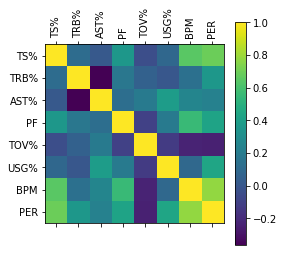

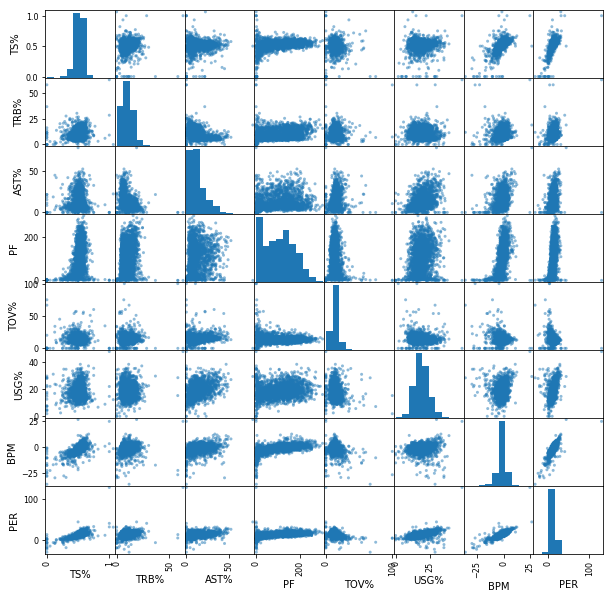

In [4]:
colist=['TS%','TRB%','AST%','PF','TOV%','USG%','BPM','PER']
plt.matshow(stats1316[colist].corr())
plt.yticks(range(len(stats1316[colist].columns)), stats1316[colist].columns)
plt.xticks(range(len(stats1316[colist].columns)), stats1316[colist].columns,rotation='vertical')
plt.colorbar()
pd.plotting.scatter_matrix(stats1316[colist],figsize=(10,10))
plt.show()

In [5]:
stats1316 = stats1316.fillna(0)
stats17 = stats17.fillna(0)

perf_var1316 = stats1316[['TS%','TRB%','AST%','STL%','TOV%','USG%','BPM']]
perf_var17 = stats17[['TS%','TRB%','AST%','STL%','TOV%','USG%','BPM']]
per = stats1316.PER

#regr1 = linear_model.LinearRegression()
regr1 = linear_model.Ridge(alpha=0.5)
#regr1 = tree.DecisionTreeRegressor()
#regr1 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
#regr1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='huber')
regr1.fit(perf_var1316, per)
per_pred = regr1.predict(perf_var17)
stats17["PER"] = per_pred; stats17 = stats17.sort_values(by=['PER'], ascending=False)

print("Score: "+str(regr1.score(perf_var1316, per)))
print(stats17[['Player','PER']])

Score: 0.8630190258423888
                    Player        PER
403      Russell Westbrook  39.925899
203         Jarnell Stokes  33.883632
194           James Harden  31.866387
109       DeMarcus Cousins  29.197434
292           LeBron James  29.083958
352           Nikola Jokic  28.850076
267           Kevin Durant  28.011433
160  Giannis Antetokounmpo  27.166318
113      Demetrius Jackson  26.886963
76              Chris Paul  26.545246
259          Kawhi Leonard  26.524724
258     Karl-Anthony Towns  26.501146
226            Joel Embiid  26.056258
28           Anthony Davis  25.822332
425          Stephen Curry  25.763337
176          Isaiah Thomas  25.186331
417             Shawn Long  24.467853
402            Rudy Gobert  24.402352
42           Blake Griffin  24.080374
217           Jimmy Butler  24.041390
43        Boban Marjanovic  23.996327
89          Damian Lillard  23.728809
105         DeAndre Jordan  23.714247
279             Kyle Lowry  23.382135
245           Josh Huest

               Player        PER
371       Paul George  21.407439
342      Myles Turner  18.465129
210       Jeff Teague  18.460588
6        Al Jefferson  18.196981
438    Thaddeus Young  15.630757
63         C.J. Miles  14.234036
269    Kevin Seraphin  13.914460
291       Lavoy Allen  12.038834
161    Glenn Robinson  11.773272
223         Joe Young  11.015886
380  Rakeem Christmas  10.547652
340       Monta Ellis  10.167746
396    Rodney Stuckey   9.715394
286  Lance Stephenson   9.218872
1        Aaron Brooks   9.190550
156     Georges Niang   1.929671


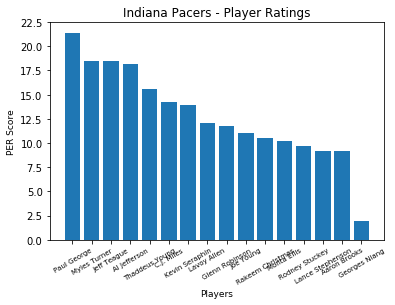

In [6]:
pacer_data = pacers[['TS%','TRB%','AST%','STL%','TOV%','USG%','BPM']]
#pacer_data = preprocessing.normalize(pacer_data) 
pacers_pie = regr1.predict(pacer_data); pacers["PER"] = pacers_pie
pacers = pacers.sort_values(by=['PER'], ascending=False); print(pacers[['Player','PER']])
index = np.arange(len(pacers))
plt.bar(index, pacers['PER'])
plt.xlabel('Players', fontsize=9)
plt.ylabel('PER Score', fontsize=9)
plt.xticks(index, pacers['Player'], fontsize=7, rotation=30)
plt.title('Indiana Pacers - Player Ratings')
plt.show()

In [7]:
top5 = pacers[:5]
salary_cap = 120000000; avail_sal = salary_cap - top5.iloc[:5,-2].sum()
pos = top5.groupby(["Pos"], as_index=False).agg({'SALARY':'sum'}); temp = top5.Pos.value_counts().to_frame(); temp=temp.sort_values(by=['Pos'], ascending=True).reset_index()
pos["Count"] = temp['Pos']
pg = stats17[stats17['Pos']=='PG'].sort_values(by=['PER'], ascending=False)
sg = stats17[stats17['Pos']=='SG'].sort_values(by=['PER'], ascending=False)
pf = stats17[stats17['Pos']=='PF'].sort_values(by=['PER'], ascending=False)
sf = stats17[stats17['Pos']=='SF'].sort_values(by=['PER'], ascending=False)
c = stats17[stats17['Pos']=='C'].sort_values(by=['PER'], ascending=False)
ind_pg = pacers[pacers['Pos']=='PG'].sort_values(by=['PER'], ascending=False)
ind_sg = pacers[pacers['Pos']=='SG'].sort_values(by=['PER'], ascending=False)
ind_pf = pacers[pacers['Pos']=='PF'].sort_values(by=['PER'], ascending=False)
ind_sf = pacers[pacers['Pos']=='SF'].sort_values(by=['PER'], ascending=False)
ind_c = pacers[pacers['Pos']=='C'].sort_values(by=['PER'], ascending=False)
print("Salary cap available: "+str(avail_sal))

nba_sg = [sg.SALARY.count(), sg.SALARY.mean(), sg.SALARY.count()/30]
nba_sf = [sf.SALARY.count(), sf.SALARY.mean(), sf.SALARY.count()/30]
nba_pg = [pg.SALARY.count(), pg.SALARY.mean(), pg.SALARY.count()/30]
nba_c = [c.SALARY.count(), c.SALARY.mean(), c.SALARY.count()/30]
nba_pf = [pf.SALARY.count(), pf.SALARY.mean(), pf.SALARY.count()/30]
nba_sal = [stats17.SALARY.count(), stats17.SALARY.mean(), stats17.SALARY.count()/30]

sg_budget = [ind_sg.SALARY.count(), ind_sg.SALARY.mean(), (ind_sg.SALARY.count()*nba_sg[1]*nba_sal[2])/pacers.SALARY.count()]
sf_budget = [ind_sf.SALARY.count(), ind_sf.SALARY.mean(), (ind_sf.SALARY.count()*nba_sf[1]*nba_sal[2])/pacers.SALARY.count()]
pg_budget = [ind_pg.SALARY.count(), ind_pg.SALARY.mean(), (ind_pg.SALARY.count()*nba_pg[1]*nba_sal[2])/pacers.SALARY.count()]
c_budget = [ind_c.SALARY.count(), ind_c.SALARY.mean(), (ind_c.SALARY.count()*nba_c[1]*nba_sal[2])/pacers.SALARY.count()]
pf_budget = [ind_pf.SALARY.count(), ind_pf.SALARY.mean(), (ind_pf.SALARY.count()*nba_pf[1]*nba_sal[2])/pacers.SALARY.count()]
pac_budget = [pacers.SALARY.count(), pacers.SALARY.mean(), nba_sal[1]*nba_sal[2]]

c_budget.append((c_budget[2]*salary_cap)/pac_budget[2])
sg_budget.append((sg_budget[2]*salary_cap)/pac_budget[2])
sf_budget.append((sf_budget[2]*salary_cap)/pac_budget[2])
pg_budget.append(((pg_budget[2]*salary_cap)/pac_budget[2])+c_budget[3])
pf_budget.append((pf_budget[2]*salary_cap)/pac_budget[2])
pac_budget.append(salary_cap)

#print(top5)
print("PG Recommendations:")
final_pg = pg[pg['SALARY'] < (pg_budget[3]-top5.iloc[2,-2])]; final_pg = final_pg[["Player","SALARY","PER"]]
final_pg = final_pg[:10]; final_pg = final_pg.sort_values(by="SALARY",ascending=True)
print(final_pg)

print("SG Recommendations:")
final_sg = sg[sg['SALARY'] < sg_budget[3]]; final_sg = final_sg[["Player","SALARY","PER"]]
final_sg = final_sg[:10]; final_sg = final_sg.sort_values(by="SALARY",ascending=True)
print(final_sg)

print("SF Recommendations:")
final_sf = sf[sf['SALARY'] < (sf_budget[3]-top5.iloc[0,-2])]; final_sf = final_sf[["Player","SALARY","PER"]]
final_sf = final_sf[:10]; final_sf = final_sf.sort_values(by="SALARY",ascending=True)
print(final_sf)

print("PF Recommendations:")
final_pf = pf[pf['SALARY'] < (pf_budget[3]-top5.iloc[4,-2])]; final_pf = final_pf[["Player","SALARY","PER"]]
final_pf = final_pf[:10]; final_pf = final_pf.sort_values(by="SALARY",ascending=True)
print(final_pf)

#cent_cap = avail_sal*(1/5); print("Centre Cap: "+str(cent_cap))
#best_c = c[c["SALARY"] <= cent_cap]; 
#print(best_c[:5])
#sg_mean = sg.SALARY.mean(); sg_tc = sg_mean/30
#sg_cap = avail_sal*(2/5); print("SG Cap: "+str(sg_cap))
#best_sf = sg[sg["SALARY"] <= sg_cap]; 
#print(best_sf[:5])
#pf_cap = avail_sal*(2/5); print("PF Cap: "+str(pf_cap))
#best_pf = pf[pf["SALARY"] <= pf_cap]; 
#print(best_pf[:5])

Salary cap available: 54354953.0
PG Recommendations:
                Player      SALARY        PER
113  Demetrius Jackson     50000.0  26.886963
176      Isaiah Thomas   6261395.0  25.186331
263       Kemba Walker  12000000.0  21.716948
231          John Wall  18063850.0  22.937467
76          Chris Paul  24599495.0  26.545246
89      Damian Lillard  26153057.0  23.728809
194       James Harden  28299399.0  31.866387
403  Russell Westbrook  28530608.0  39.925899
331        Mike Conley  28530608.0  23.046513
279         Kyle Lowry  28703704.0  23.382135
SG Recommendations:
               Player      SALARY        PER
239   Jordan Crawford    250000.0  16.568368
136       Dwyane Wade   2328652.0  18.855369
305     Manu Ginobili   2500000.0  15.522122
152       Gary Harris   2550055.0  15.668229
477       Will Barton   3533333.0  15.883528
366  Patrick Beverley   5513514.0  15.350130
294      Lou Williams   7000000.0  17.484161
213       Jeremy Lamb   7000000.0  16.946580
36      Avery Br

In [8]:
frames=[pacers,stats17]
result = pd.concat(frames)
result['Tm'].rename('Team')
print(result.PER)

371    21.407439
342    18.465129
210    18.460588
6      18.196981
438    15.630757
63     14.234036
269    13.914460
291    12.038834
161    11.773272
223    11.015886
380    10.547652
340    10.167746
396     9.715394
286     9.218872
1       9.190550
156     1.929671
403    39.925899
203    33.883632
194    31.866387
109    29.197434
292    29.083958
352    28.850076
267    28.011433
160    27.166318
113    26.886963
76     26.545246
259    26.524724
258    26.501146
226    26.056258
28     25.822332
         ...    
212     5.831615
357     5.636800
281     5.311334
188     5.075661
32      4.884264
88      4.607569
154     4.263441
241     3.942067
22      3.917305
410     3.598961
285     3.154158
399     3.139958
16      2.994854
204     2.956165
96      2.600007
65      2.059123
166     1.984736
230     1.919715
427     0.141336
125    -0.542389
141    -0.982225
37     -1.121251
3      -1.121495
329    -1.237872
175    -2.365742
336    -2.976817
153    -3.304688
378    -9.3202

In [ ]:
plt.figure(figsize=(16, 6))
cust = {Tm: "teal" if Tm== "IND" else "lightblue" for Tm in result.Tm.unique()}
sal_box = sns.boxplot(x='Tm',y='SALARY', data=result, width=0.6, palette=cust)

In [ ]:
result.head()

In [ ]:
# density plot with shade
sns.kdeplot(result['PER'],shade=True,color='lightblue',legend=False).set_title('Distribution of predicted PER')

In [ ]:
by_pos=result.groupby('Pos').mean().reset_index()

In [ ]:
by_pos=by_pos.sort_values(by='Pos')
sns.barplot(x='PTS',y='Pos', data=by_pos, palette='Blues')
plt.title("Season points")

In [ ]:
by_pos=by_pos.sort_values(by='Pos')
sns.barplot(x='TRB',y='Pos', data=by_pos, palette='Blues')
plt.title("Total Rebounds (TRB)")

In [ ]:
by_pos=by_pos.sort_values(by='Pos')
sns.barplot(x='AST',y='Pos', data=by_pos, palette='Blues')
plt.title("Assists (AST)")

In [ ]:
by_pos=by_pos.sort_values(by='Pos')
sns.barplot(x='STL',y='Pos', data=by_pos, palette='Blues')
plt.title("Steals (STL)")

In [ ]:
by_pos=by_pos.sort_values(by='Pos')
sns.barplot(x='TOV',y='Pos', data=by_pos, palette='Blues')
plt.title("Turnover (TOV)")

In [ ]:
by_pos=by_pos.sort_values(by='Pos')
sns.barplot(x='BLK',y='Pos', data=by_pos, palette='Blues')
plt.title("Blocks (BLK)")

In [ ]:
by_pos=by_pos.sort_values(by='Pos')
sns.barplot(x='PF',y='Pos', data=by_pos, palette='Blues')
plt.title("Personal Fouls (PF)")

In [ ]:
avg_pos=result.groupby('Pos').agg({'SALARY':'mean','Tm':'count','Age':'mean'})
avg_pos['P_Tm']=(avg_pos['Tm']/30).round(0)
avg_pos['av_sal']=(avg_pos['SALARY']/1000000).round(2)
avg_pos.head()

In [ ]:
colist=["TS%", "PTS", "TRB", "AST", "TOV", "PF", "USG%","BPM","SALARY","G"]
new_df= result[colist].copy()
desc_df=new_df.describe(include= "all")
desc_df[colist]=desc_df[colist].round(2)
desc_df.head(10)

In [9]:
result.head()

,Player,Pos,Tm,G,GS,MP,TS%,3PAr,FTr,ORB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Age,SALARY,PER
371,Paul George,SF,IND,75,75,2689,0.586,0.368,0.277,2.5,...,492,251,117,27,218,206,1775,26,19508958.0,21.407439
342,Myles Turner,C,IND,81,81,2541,0.585,0.132,0.349,6.2,...,587,106,74,173,105,262,1173,20,2569920.0,18.465129
210,Jeff Teague,PG,IND,82,82,2657,0.574,0.277,0.457,1.4,...,331,639,100,32,216,165,1254,28,19000000.0,18.460588
6,Al Jefferson,C,IND,66,1,931,0.526,0.002,0.180,9.2,...,278,57,19,16,33,125,535,32,9769821.0,18.196981
438,Thaddeus Young,PF,IND,74,74,2237,0.562,0.172,0.125,6.7,...,449,122,114,30,96,135,814,28,14796348.0,15.630757


In [16]:
print(result.Tm.unique)

<bound method Series.unique of 371    IND
342    IND
210    IND
6      IND
438    IND
63     IND
269    IND
291    IND
161    IND
223    IND
380    IND
340    IND
396    IND
286    IND
1      IND
156    IND
403    OKC
203    DEN
194    HOU
109    NOP
292    CLE
352    DEN
267    GSW
160    MIL
113    BOS
76     LAC
259    SAS
258    MIN
226    PHI
28     NOP
      ... 
212    OKC
357    OKC
281    OKC
188    POR
32     ORL
88     GSW
154    MIL
241    MIN
22     CLE
410    OKC
285    ATL
399    PHO
16     DEN
204    NOP
96     WAS
65     ORL
166    BRK
230    MIN
427    MIL
125    LAC
141    PHO
37     NOP
3      CHO
329    DET
175    HOU
336    CHO
153    ATL
378    CHI
365    ORL
38     DAL
Name: Tm, Length: 486, dtype: object>
